In [2]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

# 1-VAZIFA: Sahifadagi jadvalni pandas dataframega aylantiring va:
# - Yil (Year) ustunini index sifatida o'qing.
# - 1990 yildan avvalgi ma'lumotlar tashlab yuboring.
# - natijani df degan o'zgaruvchiga saqlang#

In [3]:
tables = pd.read_html('https://en.tutiempo.net/climate/ws-384570.html', index_col=0)
df = tables[0][tables[0].index > 1990]
df.head()

,T,TM,Tm,PP,V,RA,SN,TS,FG,TN,GR
Year,,,,,,,,,,,
1991,14.4,21.2,8.3,460.52,5.1,77,26,15,17,0,1
1992,14.4,20.8,8.6,470.39,5.1,93,19,9,2,0,1
1993,13.4,19.6,7.6,710.97,5.4,98,38,12,10,1,0
1994,14.4,21.1,8,595.38,5.1,66,28,4,9,0,0
1995,15,22.2,8.4,189.99,4.4,41,20,8,12,0,0


# 2-VAZIFA. Har bir ustun nimani anglatishi ham yuqoridagi sahifada joylashgan. Shu jadvalni ham chiqaring. Matnlarni Google translate orqali tarjima qilib, uqib oling.

In [5]:
df1 = tables[1].reset_index()
df1

,0,1
0,T,Average annual temperature (°C)
1,TM,Annual average maximum temperature (°C)
2,Tm,Average annual minimum temperature (°C)
3,PP,Rain or snow precipitation total annual
4,V,Annual average wind speed (km/h)
5,RA,Number of days with rain
6,SN,Number of days with snow
7,TS,Number of days with storm
8,FG,Number of foggy days
9,TN,Number of days with tornado


# dfni tahlil qilamiz

In [6]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Index: 35 entries, 1991 to 2025
Data columns (total 11 columns):
 #   Column  Non-Null Count  Dtype 
---  ------  --------------  ----- 
 0   T       35 non-null     object
 1   TM      35 non-null     object
 2   Tm      35 non-null     object
 3   PP      35 non-null     object
 4   V       35 non-null     object
 5   RA      35 non-null     object
 6   SN      35 non-null     object
 7   TS      35 non-null     object
 8   FG      35 non-null     object
 9   TN      35 non-null     object
 10  GR      35 non-null     object
dtypes: object(11)
memory usage: 3.3+ KB


#  dfdagi barcha - belgilarni NaN qiymat bilan almashtiring.

In [10]:
df = df.replace('-', np.nan)
df.head()

,T,TM,Tm,PP,V,RA,SN,TS,FG,TN,GR
Year,,,,,,,,,,,
1991,14.4,21.2,8.3,460.52,5.1,77,26,15,17,0,1
1992,14.4,20.8,8.6,470.39,5.1,93,19,9,2,0,1
1993,13.4,19.6,7.6,710.97,5.4,98,38,12,10,1,0
1994,14.4,21.1,8,595.38,5.1,66,28,4,9,0,0
1995,15,22.2,8.4,189.99,4.4,41,20,8,12,0,0


# df ustunlari qiymatlarini matndan o'nlik songa (float) o'zgartiring.

In [12]:
df = df.astype(np.float64)
df.head()

,T,TM,Tm,PP,V,RA,SN,TS,FG,TN,GR
Year,,,,,,,,,,,
1991,14.4,21.2,8.3,460.52,5.1,77.0,26.0,15.0,17.0,0.0,1.0
1992,14.4,20.8,8.6,470.39,5.1,93.0,19.0,9.0,2.0,0.0,1.0
1993,13.4,19.6,7.6,710.97,5.4,98.0,38.0,12.0,10.0,1.0,0.0
1994,14.4,21.1,8.0,595.38,5.1,66.0,28.0,4.0,9.0,0.0,0.0
1995,15.0,22.2,8.4,189.99,4.4,41.0,20.0,8.0,12.0,0.0,0.0


# . Har bir ustundagi NaN qiymatlar soni va ularning proprosiyasini toping.

In [17]:
df.isnull().sum()
df.shape
df.isnull().sum() / df.shape[0] * 100

T     17.142857
TM    17.142857
Tm    17.142857
PP    74.285714
V     17.142857
RA    14.285714
SN    14.285714
TS    14.285714
FG    14.285714
TN    14.285714
GR    14.285714
dtype: float64

# Eng ko'p nan qiymat mavjud ustunni tashlab yuboring va natijani saqlab qoling.

In [19]:
df.drop(labels='PP', axis=1, inplace=True)
df.head()

,T,TM,Tm,V,RA,SN,TS,FG,TN,GR
Year,,,,,,,,,,
1991,14.4,21.2,8.3,5.1,77.0,26.0,15.0,17.0,0.0,1.0
1992,14.4,20.8,8.6,5.1,93.0,19.0,9.0,2.0,0.0,1.0
1993,13.4,19.6,7.6,5.4,98.0,38.0,12.0,10.0,1.0,0.0
1994,14.4,21.1,8.0,5.1,66.0,28.0,4.0,9.0,0.0,0.0
1995,15.0,22.2,8.4,4.4,41.0,20.0,8.0,12.0,0.0,0.0


# . Qolgan NaN qiymatlarni o'zingiz to'g'ri deb bilgan usulda to'ldiring (tashlab yubormang) va natijani saqlab qoling.

In [21]:
df.ffill(inplace=True)
df.head(10)

,T,TM,Tm,V,RA,SN,TS,FG,TN,GR
Year,,,,,,,,,,
1991,14.4,21.2,8.3,5.1,77.0,26.0,15.0,17.0,0.0,1.0
1992,14.4,20.8,8.6,5.1,93.0,19.0,9.0,2.0,0.0,1.0
1993,13.4,19.6,7.6,5.4,98.0,38.0,12.0,10.0,1.0,0.0
1994,14.4,21.1,8.0,5.1,66.0,28.0,4.0,9.0,0.0,0.0
1995,15.0,22.2,8.4,4.4,41.0,20.0,8.0,12.0,0.0,0.0
1996,14.0,20.5,7.6,5.0,68.0,23.0,14.0,13.0,0.0,0.0
1997,14.0,20.5,7.6,5.0,68.0,23.0,14.0,13.0,0.0,0.0
1998,14.0,20.5,7.6,5.0,68.0,23.0,14.0,13.0,0.0,0.0
1999,15.7,22.4,8.9,7.6,98.0,15.0,13.0,18.0,0.0,0.0


#  Yakuniy df ni csv faylga saqlab, kompyuterga (yoki githubga) yuklab oling (keyingi darsda ishlatamiz)

In [22]:
df.to_csv('Updated_climate.csv', index=False)

#  dfdan yillik o'rtacha haroratni ko'rsatuvchi ustunni x o'zgaruvchiga saqlang va plt.plot() yordamida chiziqli grafik chizing.

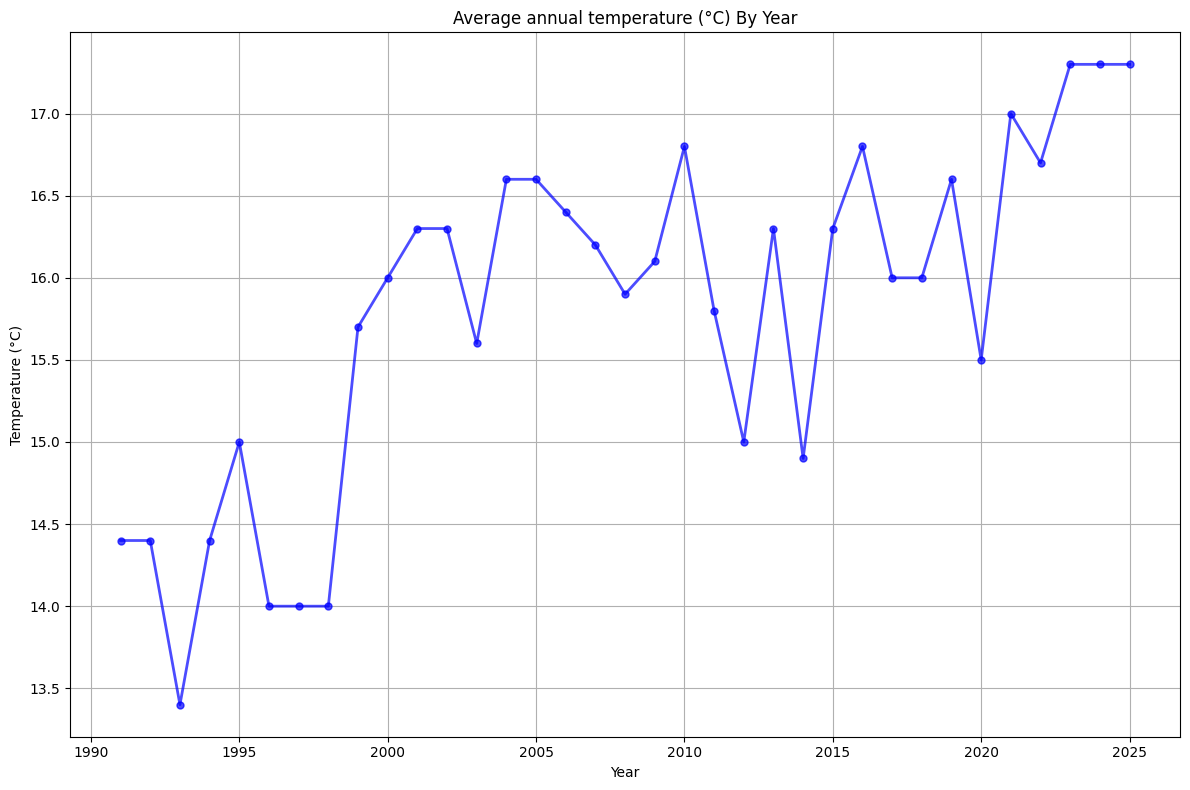

In [34]:
x = df['T']

plt.figure(figsize=(12, 8))

plt.plot(x,  color='b', lw=2, marker='o', markersize=5, alpha=0.7)
plt.title(label='Average annual temperature (°C) By Year')
plt.xlabel('Year')
plt.ylabel('Temperature (°C)')
plt.grid()
plt.tight_layout()
plt.savefig('graph1.png')
plt.show()

# Toshkent shahri uchun, har bir yilda o'rtacha min va max haroratlarni ko'rsatuvchi grafik chizing. Grafikni faylga saqlab oling

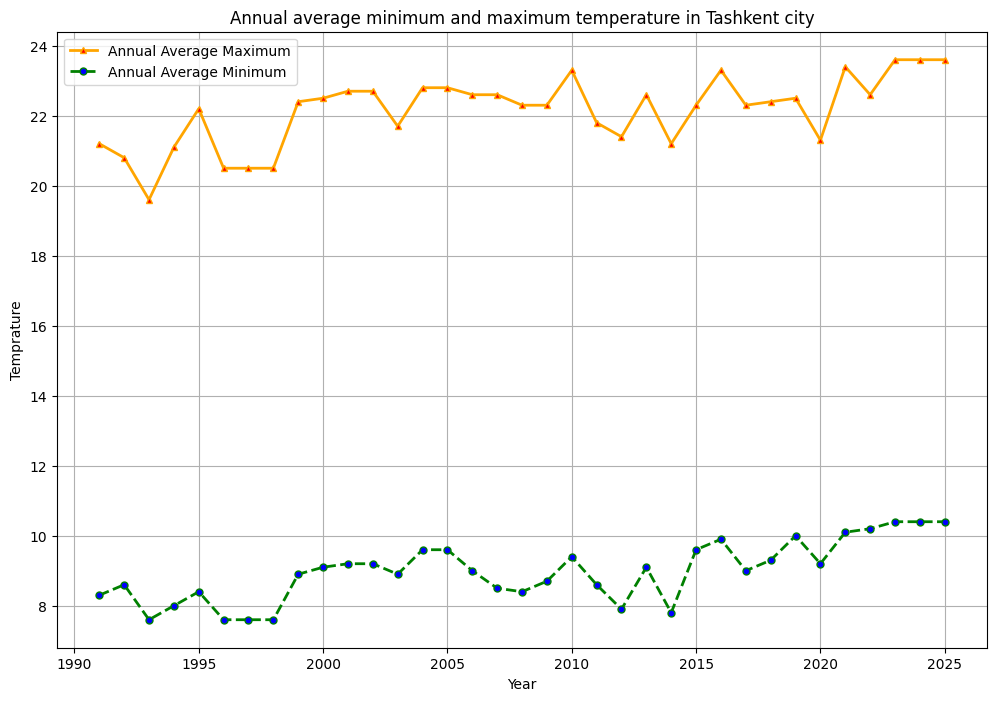

In [59]:
maxT = df['TM']
minT = df['Tm']


plt.figure(figsize=(12, 8))

plt.plot(maxT, color='orange', lw=2, marker='^', markersize=5, mfc='red')
plt.plot(minT, color='green', lw=2, ls='--', marker='o', markersize=5, mfc='blue')
plt.title('Annual average minimum and maximum temperature in Tashkent city')
plt.xlabel('Year')
plt.legend(['Annual Average Maximum', 'Annual Average Minimum'])
plt.ylabel('Temprature')
plt.grid(which='both')
plt.savefig('annualavgT.png')

plt.show()